In [122]:
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
from datetime import datetime
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [123]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        f = pd.read_csv(file_url)
        f['WEEK_NUM'] = week_num
        dfs.append(f)
    return pd.concat(dfs)

**TA COMMENT:**

This helper function is great coding practice. One improvement to make on this function might be to include a way to catch bad urls. For example, if the mta website was missing one week's worth of data then your function would throw an error when trying to access a broken url.

# Challenge 1

In [124]:
week_nums = ['170701', '170624', '170617', '170610', '170603']
df = get_data(week_nums)

In [125]:
df.columns = df.columns.str.strip()

In [126]:
df['LOC'] = tuple(zip(df['C/A'], df.UNIT, df.SCP, df.STATION))

In [127]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEK_NUM,LOC
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,00:00:00,REGULAR,6233682,2110437,170701,"(A002, R051, 02-00-00, 59 ST)"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,04:00:00,REGULAR,6233696,2110445,170701,"(A002, R051, 02-00-00, 59 ST)"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,08:00:00,REGULAR,6233712,2110473,170701,"(A002, R051, 02-00-00, 59 ST)"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,12:00:00,REGULAR,6233790,2110560,170701,"(A002, R051, 02-00-00, 59 ST)"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,16:00:00,REGULAR,6233942,2110622,170701,"(A002, R051, 02-00-00, 59 ST)"


# Challenge 2

In [128]:
df['DATETIME'] = df['DATE'] + " " + df['TIME']

In [129]:
df['DATETIME'] = df['DATETIME'].map(pd.to_datetime)

In [130]:
df['ENTRIES_DIFF'] = abs(df['ENTRIES']) - abs(df['ENTRIES'].shift(1))
df['EXITS_DIFF'] = abs(df['EXITS']) - abs(df['EXITS'].shift(1))


In [131]:
df['ENTRIES_DIFF'] = abs(df['ENTRIES_DIFF'])
df['EXITS_DIFF'] = abs(df['EXITS_DIFF'])
df.EXITS_DIFF[df['EXITS_DIFF'] > 10000] = np.nan
df.ENTRIES_DIFF[df['ENTRIES_DIFF'] > 10000] = np.nan
df.EXITS_DIFF[df['EXITS_DIFF'] < 0] = np.nan
df.ENTRIES_DIFF[df['ENTRIES_DIFF'] < 0] = np.nan

/Users/bekcunning/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bekcunning/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/bekcunning/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

**TA COMMENT:**

I think I follow, for the most part, what you were trying to do here. The problem you were probably running into was that the entries and exits counts resets and so when you try to calculate the difference between the previous day and the current day you find large negative values in the dataframe. 

Instead of taking the absolute values then finding the difference and then setting the values greater than 10,000 to null values, it might be easier to just calculate the differences and set only the negative values to null values. Setting the cut off at 10,000 is probably safe since turnstiles shouldn't see more than 10,000 people every 4 hour period, but its not as robust as just searching for negative count values which should always indicate a count reset.

In [132]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,WEEK_NUM,LOC,DATETIME,ENTRIES_DIFF,EXITS_DIFF
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,00:00:00,REGULAR,6233682,2110437,170701,"(A002, R051, 02-00-00, 59 ST)",2017-06-24 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,04:00:00,REGULAR,6233696,2110445,170701,"(A002, R051, 02-00-00, 59 ST)",2017-06-24 04:00:00,14.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,08:00:00,REGULAR,6233712,2110473,170701,"(A002, R051, 02-00-00, 59 ST)",2017-06-24 08:00:00,16.0,28.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,12:00:00,REGULAR,6233790,2110560,170701,"(A002, R051, 02-00-00, 59 ST)",2017-06-24 12:00:00,78.0,87.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/24/2017,16:00:00,REGULAR,6233942,2110622,170701,"(A002, R051, 02-00-00, 59 ST)",2017-06-24 16:00:00,152.0,62.0


# Challenge 2

In [133]:
gb = df.groupby(['LOC', 'DATETIME'])[['ENTRIES_DIFF', 'EXITS_DIFF']].sum()

In [134]:
gb.head()

ENTRIES_DIFF  EXITS_DIFF
LOC                           DATETIME                                     
(A002, R051, 02-00-00, 59 ST) 2017-05-27 00:00:00           NaN         NaN
                              2017-05-27 04:00:00          23.0         1.0
                              2017-05-27 08:00:00          16.0        29.0
                              2017-05-27 12:00:00          90.0        85.0
                              2017-05-27 16:00:00         172.0        59.0

# Challenge 3 - create a time series

In [135]:
df.set_index('LOC', inplace=True)
entriesgb = df.groupby(['LOC', 'DATE'])['ENTRIES_DIFF'].sum()

In [136]:
series_for_loc = {}
for location in df.index.unique():
    f = entriesgb.loc[location]
    series_for_loc[location] = list(zip(f.index, f.values))
	
series_for_loc[('A002', 'R051', '02-00-00', '59 ST')][0:5]

[('05/27/2017', 548.0),
 ('05/28/2017', 681.0),
 ('05/29/2017', 661.0),
 ('05/30/2017', 1517.0),
 ('05/31/2017', 1576.0)]

# Challenge 4 - plot the time series

In [137]:
dates = [x[0] for x in series_for_loc[('A002', 'R051', '02-00-00', '59 ST')]]
counts = [x[1] for x in series_for_loc[('A002', 'R051', '02-00-00', '59 ST')]]

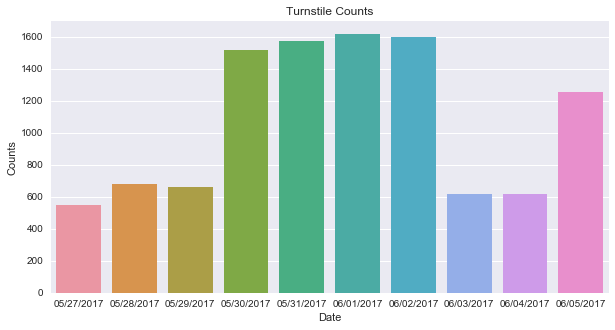

In [138]:
dates = dates[0:10]
counts = counts[0:10]
dates.sort()
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Turnstile Counts')
sns.barplot(dates, counts);

# Challenge 5

In [139]:
df['SUPER_LOCATION'] = tuple(zip(df['C/A'], df.UNIT, df.STATION))
df['TRAFFIC_TTL'] = df['ENTRIES_DIFF']
sum_by_day_time_gb = df.groupby(['SUPER_LOCATION','DATE']).TRAFFIC_TTL.agg(['sum']).reset_index()

In [140]:
sum_by_day_time_gb.head()

,SUPER_LOCATION,DATE,sum
0,"(A002, R051, 59 ST)",05/27/2017,7237.0
1,"(A002, R051, 59 ST)",05/28/2017,7055.0
2,"(A002, R051, 59 ST)",05/29/2017,6046.0
3,"(A002, R051, 59 ST)",05/30/2017,13498.0
4,"(A002, R051, 59 ST)",05/31/2017,14543.0


# Challenge 6

In [141]:
sum_by_station_gb = df.groupby(['STATION','DATE']).TRAFFIC_TTL.agg(['sum']).reset_index()
sum_by_station_gb.head()

,STATION,DATE,sum
0,1 AV,05/27/2017,9.0
1,1 AV,05/28/2017,9.0
2,1 AV,05/29/2017,35.0
3,1 AV,05/30/2017,16298.0
4,1 AV,05/31/2017,21844.0


# Challenge 7 - plot station time series

In [142]:
counts = sum_by_station_gb[sum_by_station_gb.STATION == '1 AV'][3:12]['sum']
dates = sum_by_station_gb[sum_by_station_gb.STATION == '1 AV'][3:12]['DATE']

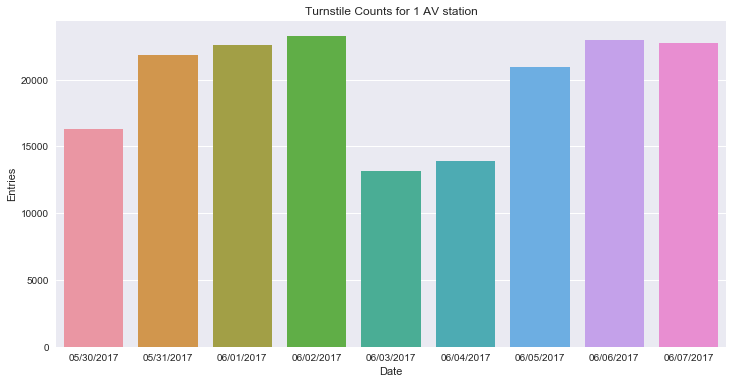

In [156]:
plt.figure(figsize=(12,6))
plt.title('Turnstile Counts for 1 AV station')
ax = sns.barplot(dates, counts);
ax.set(xlabel='Date', ylabel='Entries');

# Challenge 8

In [144]:
sum_by_station_gb['DATE'] = sum_by_station_gb['DATE'].map(pd.to_datetime)
sum_by_station_gb['WEEK'] = sum_by_station_gb['DATE'].map(pd.to_datetime).dt.week

sum_by_station_gb.set_index('DATE')
sum_by_station_gb.sort_values(by='DATE')
sum_by_station_gb.head()

,STATION,DATE,sum,WEEK
0,1 AV,2017-05-27,9.0,21
1,1 AV,2017-05-28,9.0,21
2,1 AV,2017-05-29,35.0,22
3,1 AV,2017-05-30,16298.0,22
4,1 AV,2017-05-31,21844.0,22


In [145]:
#remove the extraneous dates that don't include a full week
sum_by_station_gb = sum_by_station_gb[(sum_by_station_gb['DATE'] > '2017-05-28') & (sum_by_station_gb['DATE'] < '2017-06-26')]

/Users/bekcunning/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


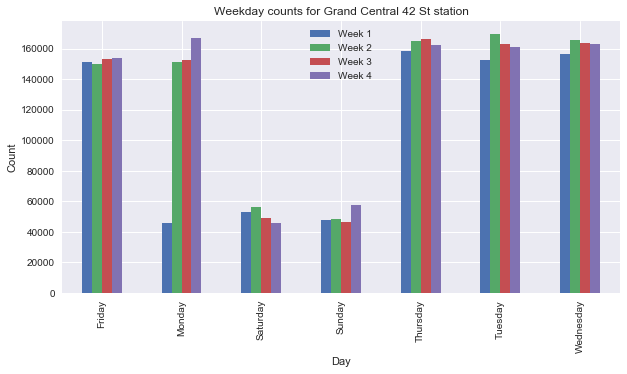

In [146]:
grouped = (sum_by_station_gb[sum_by_station_gb.STATION == 'GRD CNTRL-42 ST']
    .groupby(sum_by_station_gb['DATE'].dt.weekday_name)                
    .apply(lambda g: g.set_index('DATE')[['sum']].resample('W', how='sum'))
    .unstack(level=1)              # pivot the col1 index rows to columns
)
grouped.sort_index()
ax = grouped.plot(kind='bar' , figsize = (10, 5), title = "Weekday counts for Grand Central 42 St station")
ax.set_xlabel('Day')
ax.set_ylabel('Count')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:4],('Week 1', 'Week 2', 'Week 3', 'Week 4'), loc='best');

**TA COMMENT:**

The process in which you create the "grouped" object seems a bit convoluted. The "sum_by_station_gb" dataframe, which has already been grouped by station and had the entries summed, should contain the information you need to create the bar plot once you filter for Grand Central station. Each week's data would need to be stored as an array and then overlaid on the same plot. 

Also, to sort the data by chronological order, the "dt.dayofweek" method should get you a numerical representation of the day of the week (Monday=0, Sunday=6). 

In [147]:
#PROBLEM - Monday week1 number seems wrong
#PROBLEM - have not solved sorting weekday names properly.

# Challenge 9

In [148]:
sum_by_station_week_gb = sum_by_station_gb.groupby(['STATION','WEEK'])['sum'].agg(['sum']).reset_index()

In [149]:
sum_by_station_week_gb.sort_values('sum', ascending=False, inplace=True)
sum_by_station_week_gb.head()

,STATION,WEEK,sum
245,34 ST-PENN STA,23,1035996.0
247,34 ST-PENN STA,25,1029309.0
246,34 ST-PENN STA,24,1019573.0
927,GRD CNTRL-42 ST,25,911029.0
244,34 ST-PENN STA,22,910826.0


# Challenge 10

In [150]:
# Let's look at week 24
sum_by_station_week_gb = sum_by_station_week_gb[sum_by_station_week_gb.WEEK == 24]
sum_by_station_week_gb.head()


,STATION,WEEK,sum
246,34 ST-PENN STA,24,1019573.0
926,GRD CNTRL-42 ST,24,893665.0
238,34 ST-HERALD SQ,24,783439.0
186,23 ST,24,693154.0
58,14 ST-UNION SQ,24,674537.0


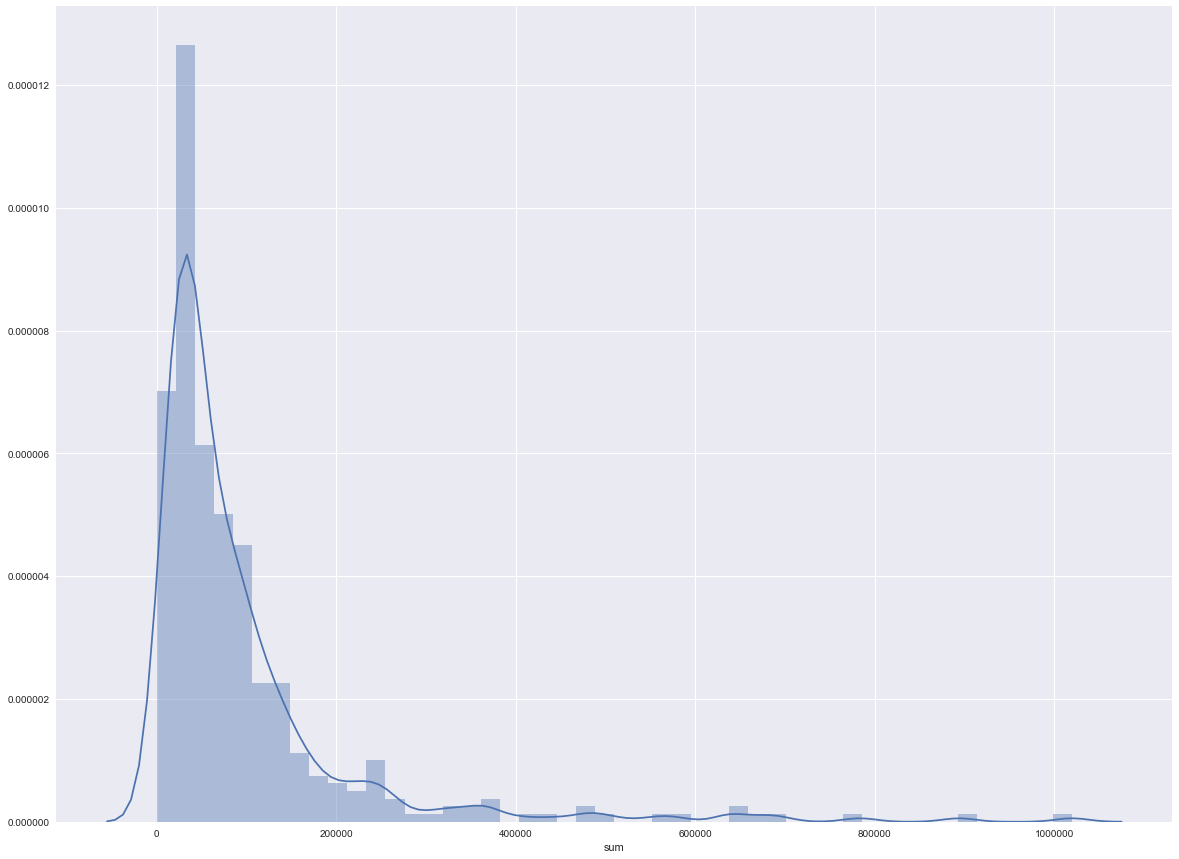

In [151]:

plt.figure(figsize=(20,15))

sns.distplot(sum_by_station_week_gb['sum']);

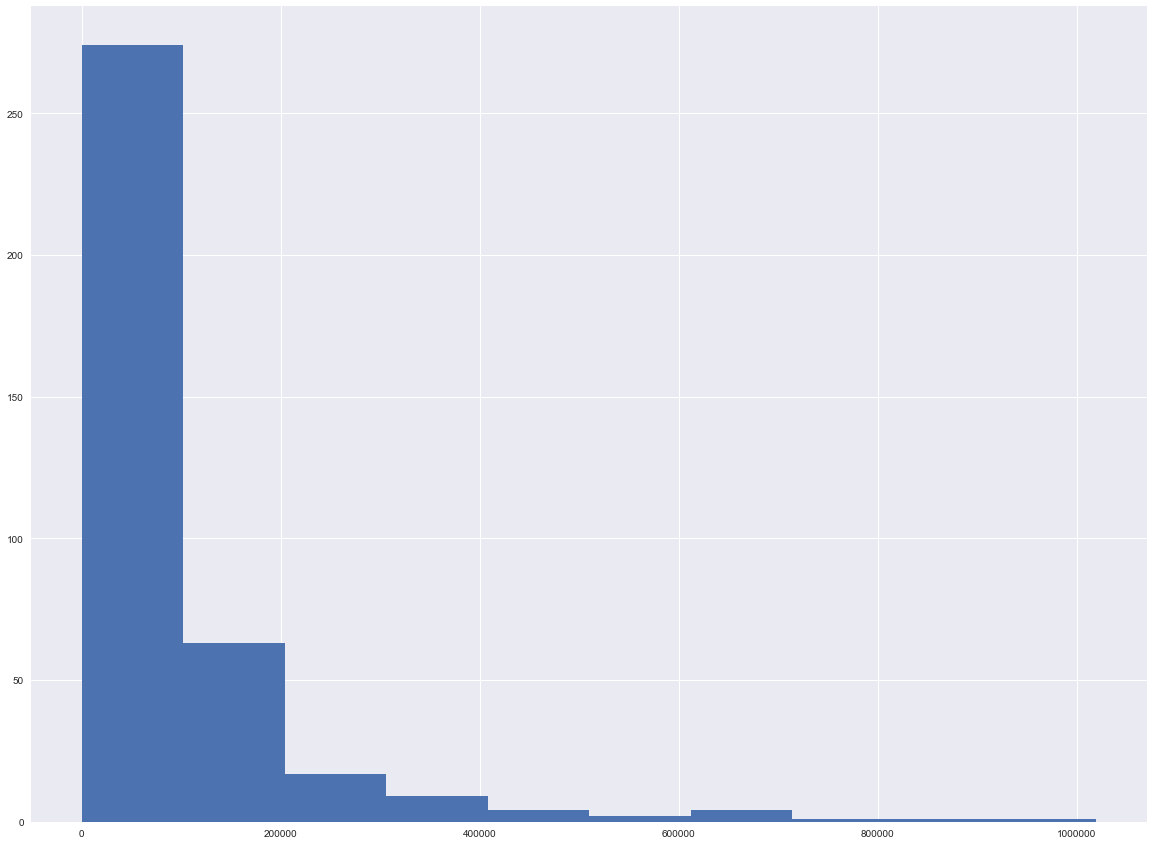

In [152]:
plt.figure(figsize=(20,15))
plt.hist(sum_by_station_week_gb['sum']);

**TA COMMENT:**

Overall, your grasp of pandas syntax and data manipulation is really good. There are a few comments throughout the notebook directed towards specific lines of code. Some general comments are:
1. Adding documentation for helper functions. Having a brief description of the function and its inputs/outputs would help yourself and others to understand better what the function is supposed to do.
2. Titling and labeling axes on plots. For the most part you did a good job on these, but a few of the plots at the end were missing titles and labels.
